In [1]:
import sys
import collections
import numpy as np
from scipy.signal import savgol_filter, convolve, normalize
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa
import time

# Allows me to import my modules
sys.path.append('./modules')
from audio_utils import *
import data_augmentation as data_aug

Attempting to read settings file...
	Read successfully!


In [231]:
file_i = 205

In [232]:
samples = read_data(data_type="cropped", file_index=file_i, batch_size=10, verbose=True)
print(len(samples) if samples is not False else 0)
file_i += 1

Attempting to read 10 cropped data and labels (from index 205 )...
	Read: 10/10 (8531 files found).
10


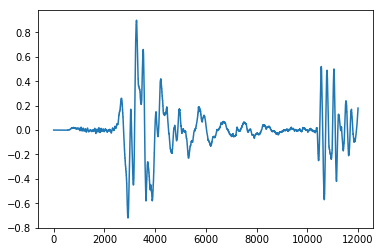

In [233]:
plt.plot(samples[0].data)
plt.show()
ipd.Audio(samples[0].data, rate=samples[0].rate)

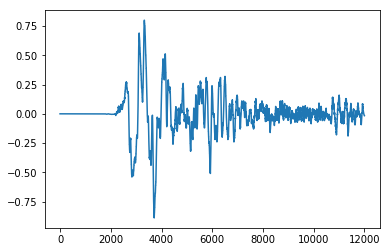

In [234]:
plt.plot(samples[1].data)
plt.show()
ipd.Audio(samples[1].data, rate=samples[1].rate)

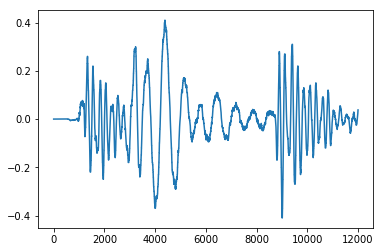

In [235]:
plt.plot(samples[2].data)
plt.show()
ipd.Audio(samples[2].data, rate=samples[2].rate)

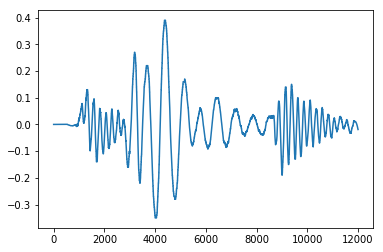

In [236]:
plt.plot(samples[3].data)
plt.show()
ipd.Audio(samples[3].data, rate=samples[3].rate)

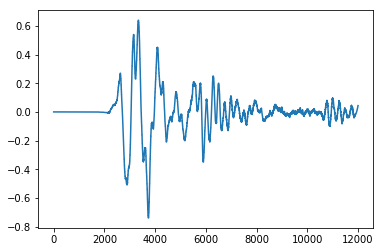

In [237]:
plt.plot(samples[4].data)
plt.show()
ipd.Audio(samples[4].data, rate=samples[4].rate)

In [238]:
augmented_samples = data_aug.pre_multiclass_augmentation(samples)

In [239]:
aug_stacks = data_aug.get_aug_stacks(data_aug.PRE_MULTI_AUGS)
# Create new augmentation data ordered dictionary
aug_data = collections.OrderedDict([("-".join(stack), []) for stack in aug_stacks])
aug_keys = list(aug_data.keys())

In [240]:
augmented_sample_data = []
for s in range(len(samples)):
    for stack_key in aug_keys:
        aug_amount = len(augmented_samples[s][stack_key])
        augs = stack_key.split("-")
        for d in range(aug_amount):
            augmented_sample_data.append(Sample_data(labels=samples[s].labels, augmentations={"pre_augs": augs}, rate=samples[s].rate, data=augmented_samples[s][stack_key][d]))

In [241]:
for asd in augmented_sample_data:
    print("Labels: {}\n\nAugmentations: {}\n\n".format(asd.labels, asd.augmentations))

Labels: {'hit_label': ['beater', 'stick', 'stick'], 'kit_label': ['bass_drum', 'crash', 'snare'], 'tech_label': ['normal', 'normal', 'normal']}

Augmentations: {'pre_augs': ['amplitude']}


Labels: {'hit_label': ['beater', 'stick', 'stick'], 'kit_label': ['bass_drum', 'crash', 'snare'], 'tech_label': ['normal', 'normal', 'normal']}

Augmentations: {'pre_augs': ['amplitude']}


Labels: {'hit_label': ['beater', 'stick', 'stick'], 'kit_label': ['bass_drum', 'crash', 'snare'], 'tech_label': ['normal', 'normal', 'normal']}

Augmentations: {'pre_augs': ['amplitude']}


Labels: {'hit_label': ['beater', 'stick', 'stick'], 'kit_label': ['bass_drum', 'crash', 'snare'], 'tech_label': ['normal', 'normal', 'normal']}

Augmentations: {'pre_augs': ['amplitude']}


Labels: {'hit_label': ['beater', 'stick', 'stick'], 'kit_label': ['bass_drum', 'crash', 'snare'], 'tech_label': ['normal', 'normal', 'normal']}

Augmentations: {'pre_augs': ['amplitude']}


Labels: {'hit_label': ['beater', 'stick', 'stick']


Labels: {'hit_label': ['beater', 'stick', 'stick'], 'kit_label': ['bass_drum', 'crash', 'snare'], 'tech_label': ['normal', 'normal', 'normal']}

Augmentations: {'pre_augs': ['amplitude', 'pitch', 'translate']}


Labels: {'hit_label': ['beater', 'stick', 'stick'], 'kit_label': ['bass_drum', 'crash', 'snare'], 'tech_label': ['normal', 'normal', 'normal']}

Augmentations: {'pre_augs': ['amplitude', 'pitch', 'translate']}


Labels: {'hit_label': ['beater', 'stick', 'stick'], 'kit_label': ['bass_drum', 'crash', 'snare'], 'tech_label': ['normal', 'normal', 'normal']}

Augmentations: {'pre_augs': ['amplitude', 'pitch', 'translate']}


Labels: {'hit_label': ['beater', 'stick', 'stick'], 'kit_label': ['bass_drum', 'crash', 'snare'], 'tech_label': ['normal', 'normal', 'normal']}

Augmentations: {'pre_augs': ['amplitude', 'pitch', 'translate']}


Labels: {'hit_label': ['beater', 'stick', 'stick'], 'kit_label': ['bass_drum', 'crash', 'snare'], 'tech_label': ['normal', 'normal', 'normal']}

Augmen

In [242]:
save_data("pre_multiclass_augmented", data_set=augmented_sample_data, verbose=True)

Attempting to save pre_multiclass_augmented data and labels...
	Saved: 2150/2150 files.


True

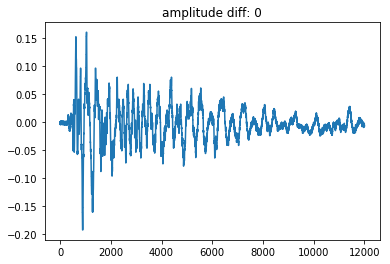

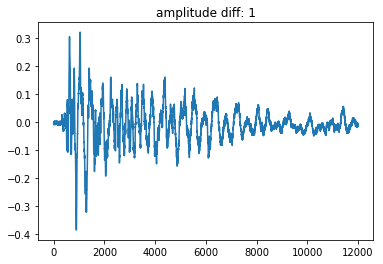

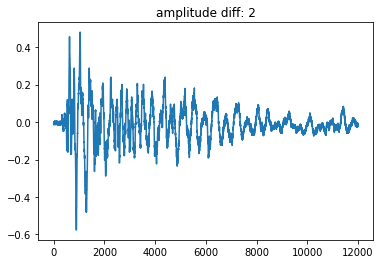

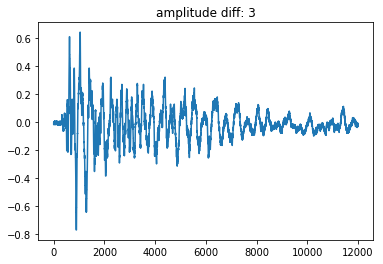

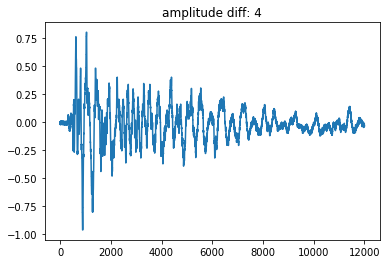

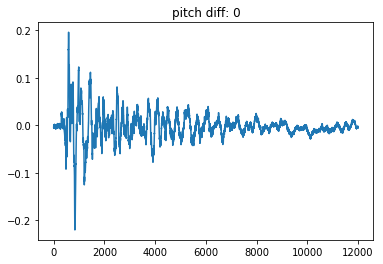

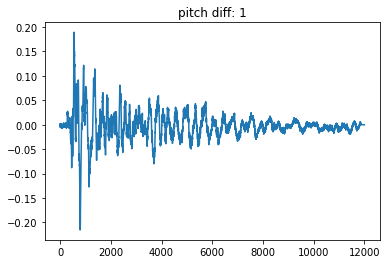

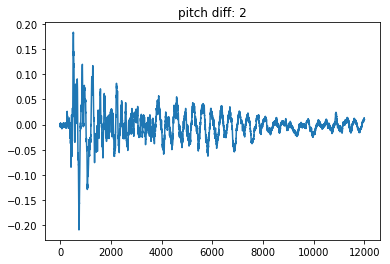

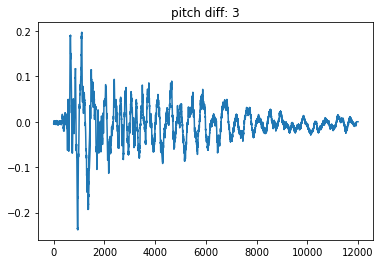

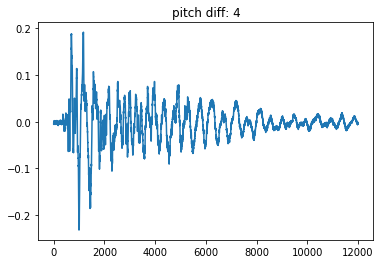

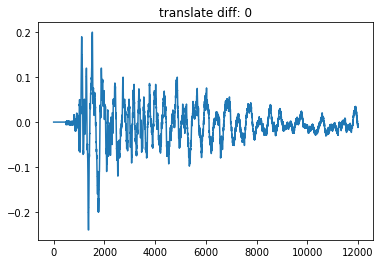

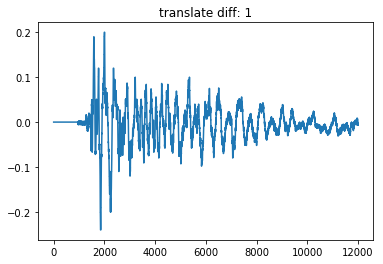

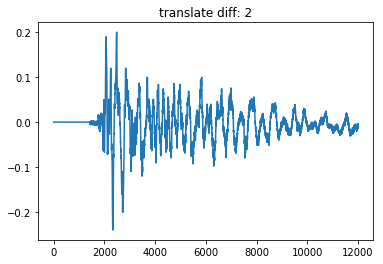

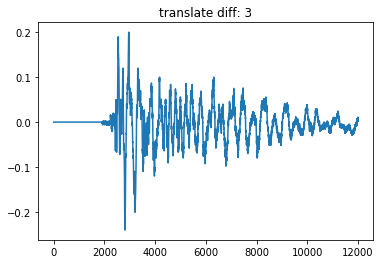

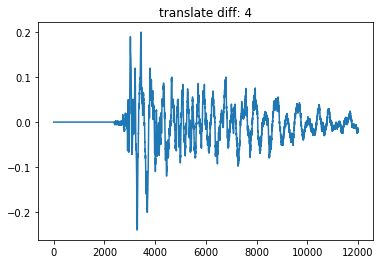

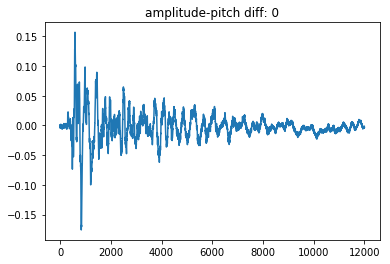

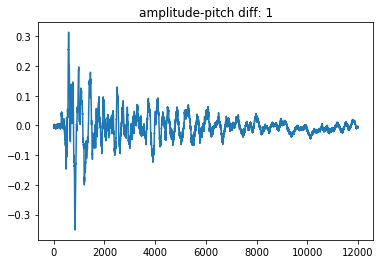

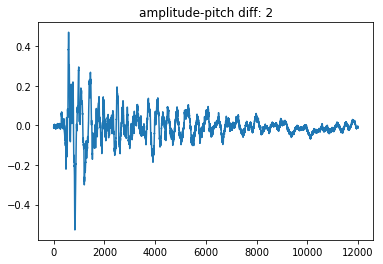

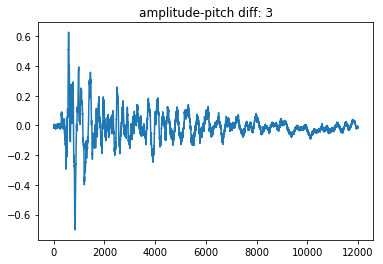

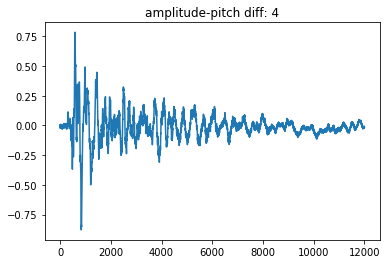

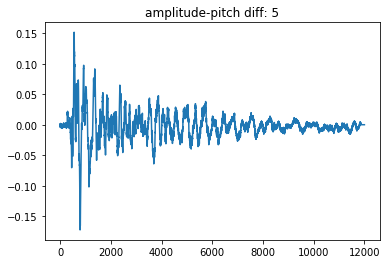

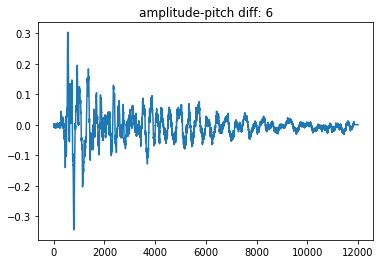

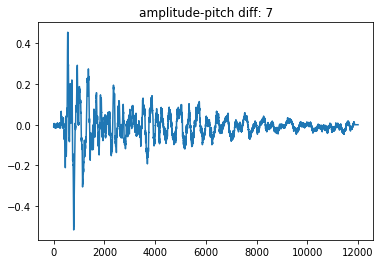

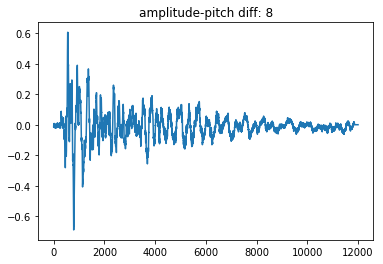

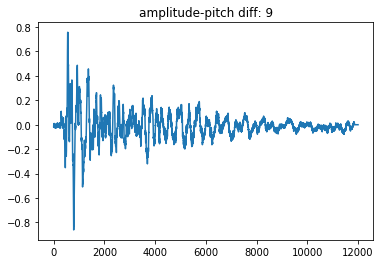

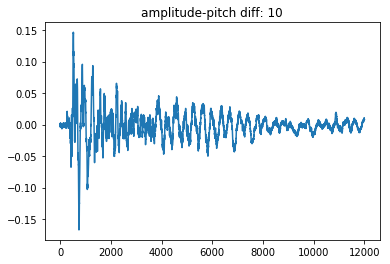

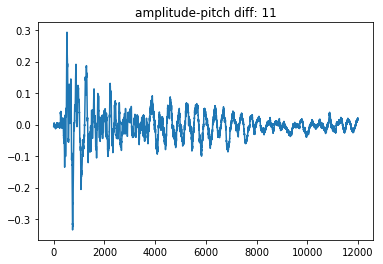

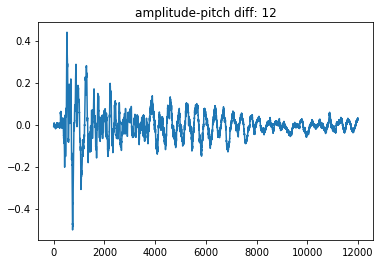

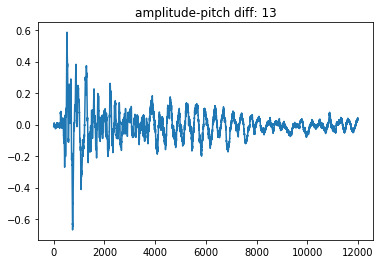

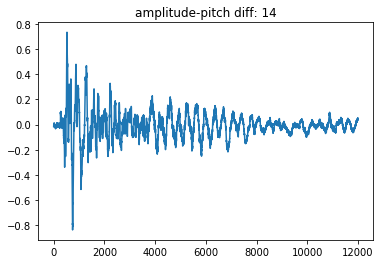

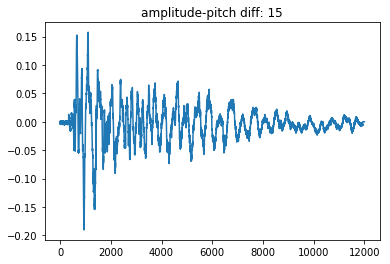

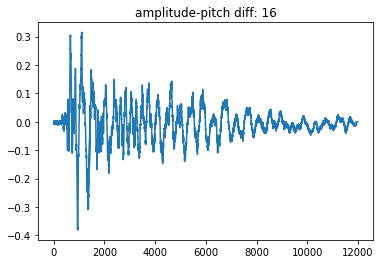

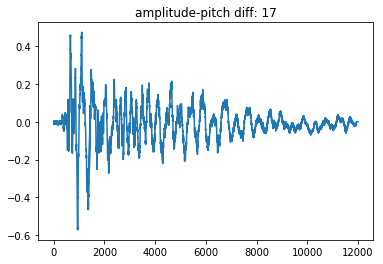

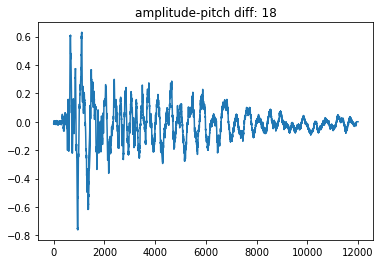

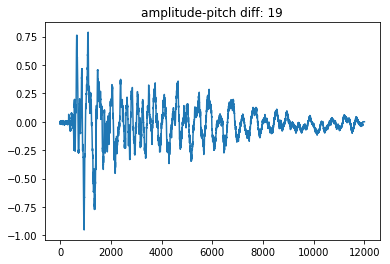

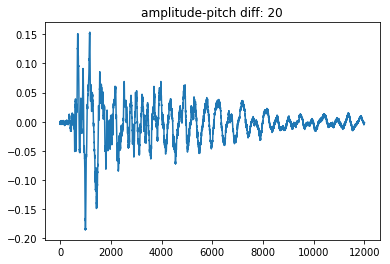

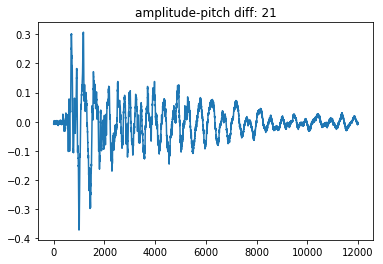

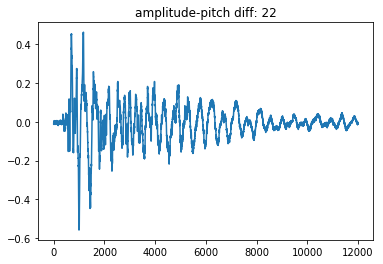

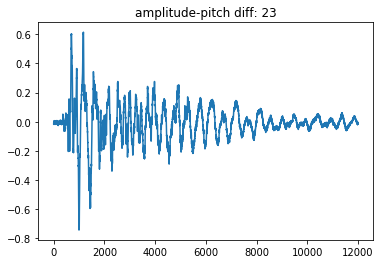

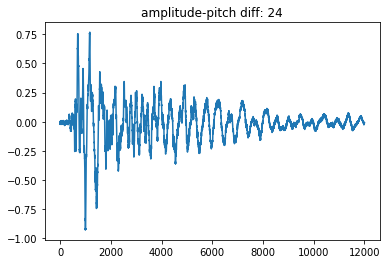

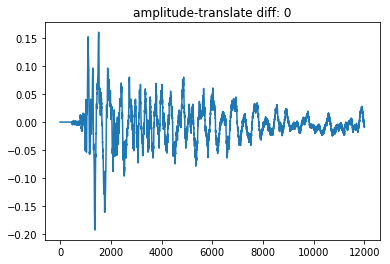

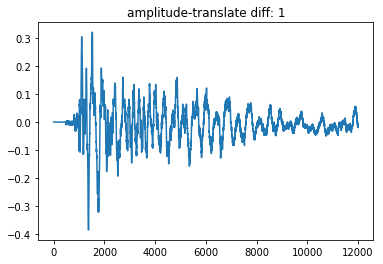

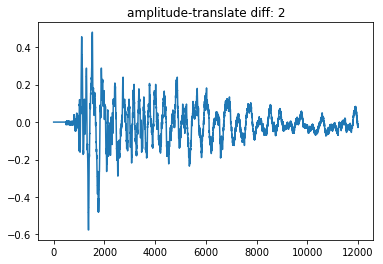

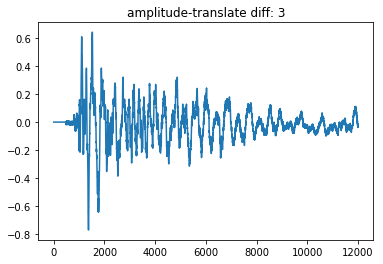

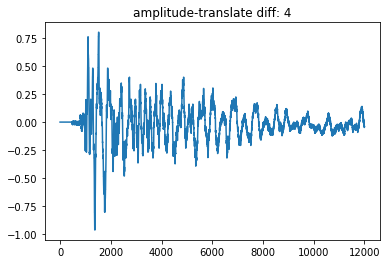

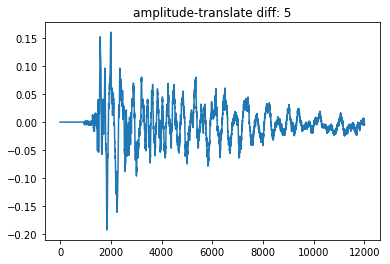

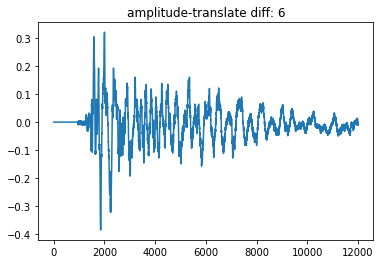

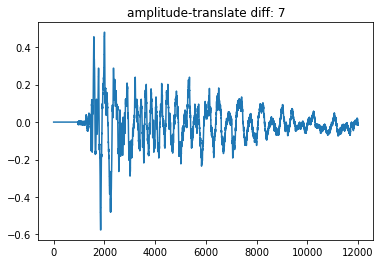

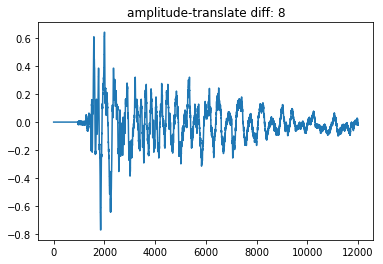

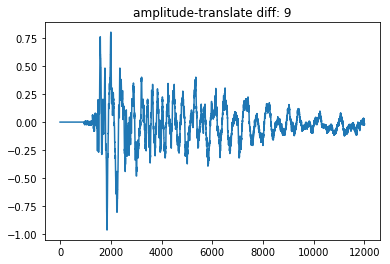

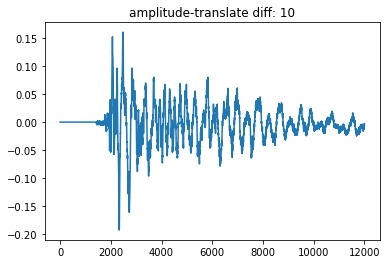

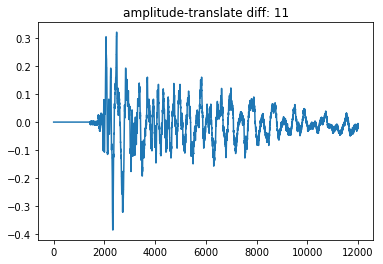

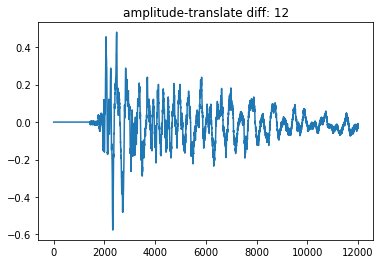

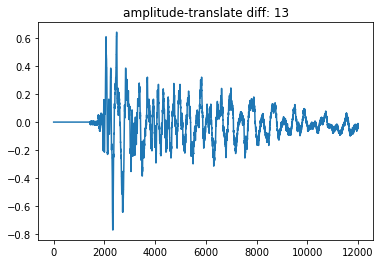

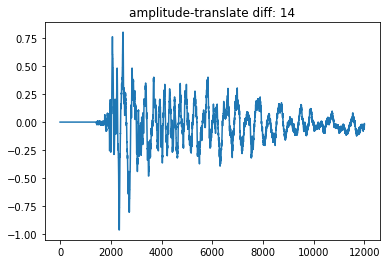

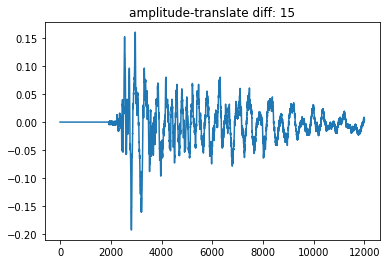

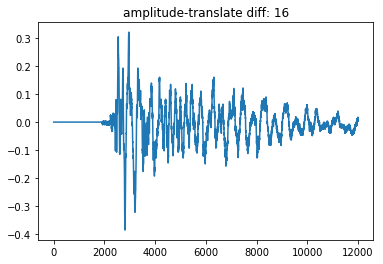

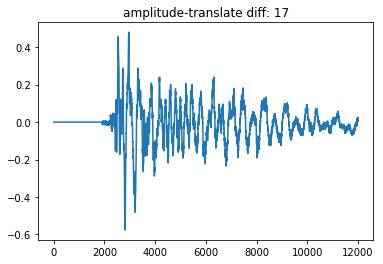

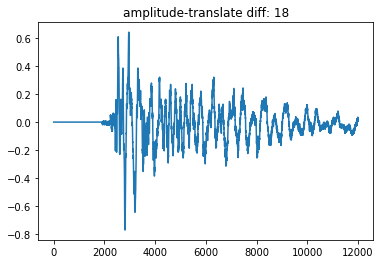

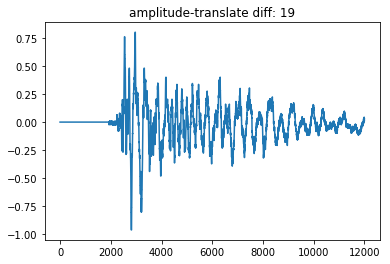

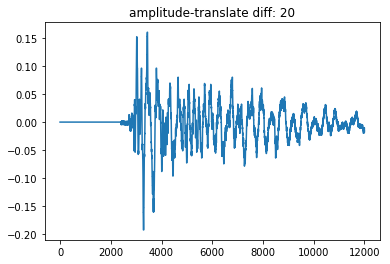

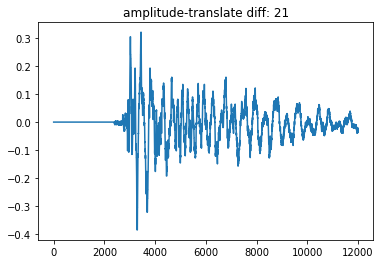

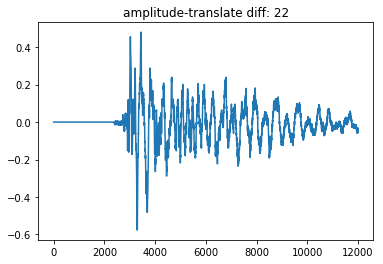

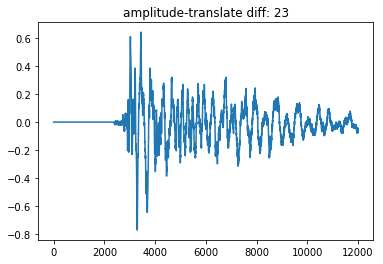

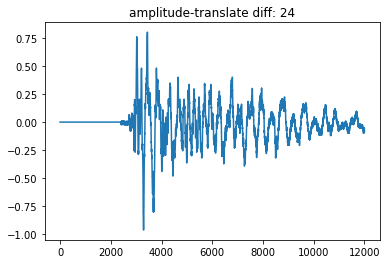

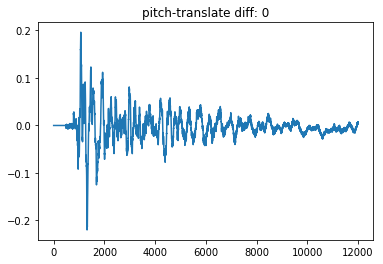

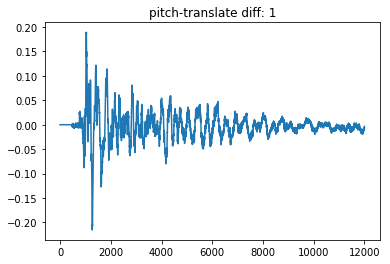

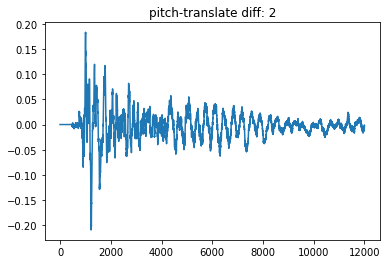

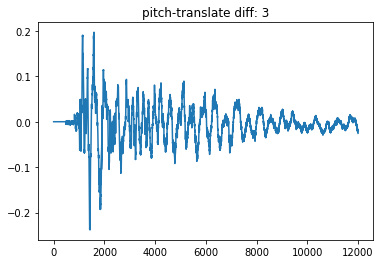

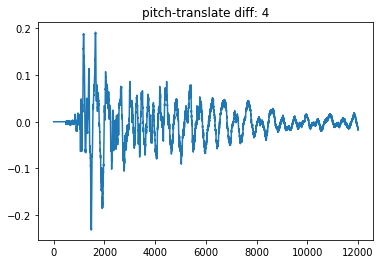

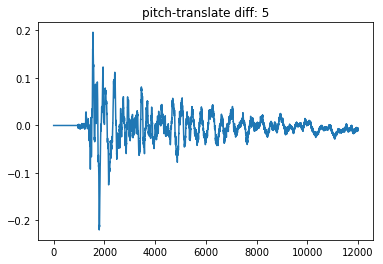

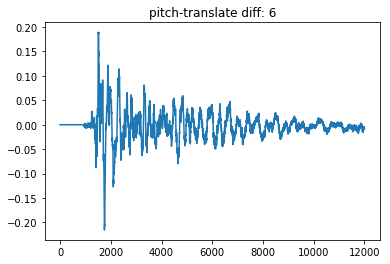

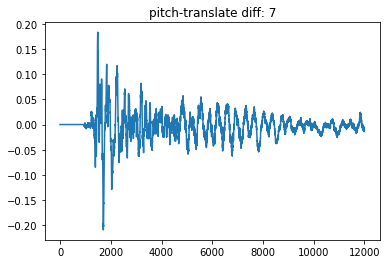

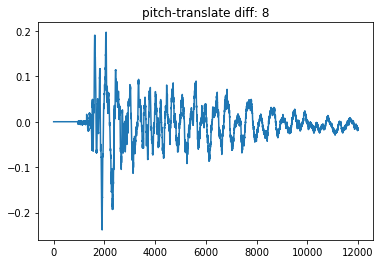

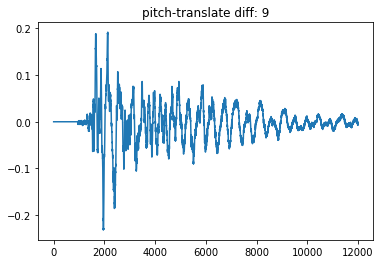

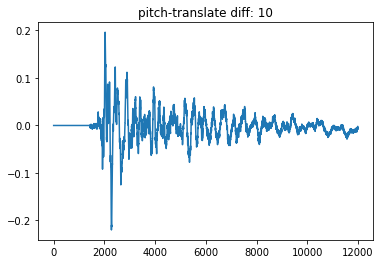

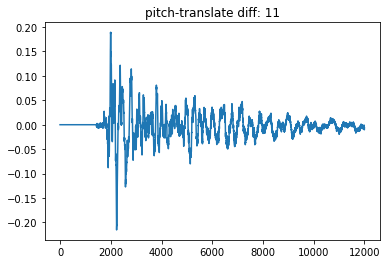

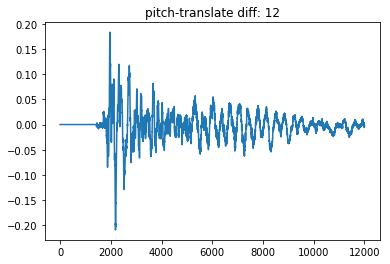

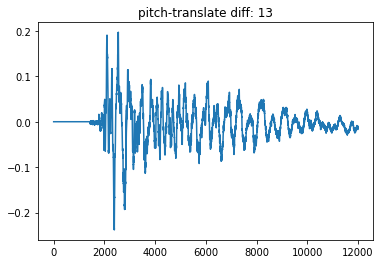

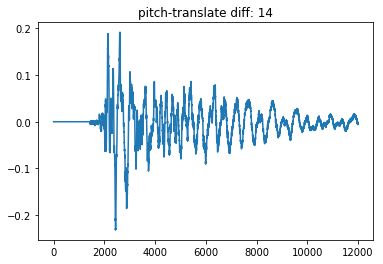

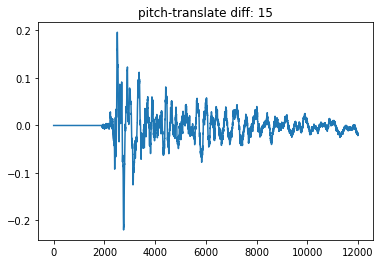

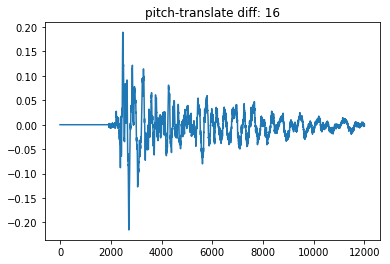

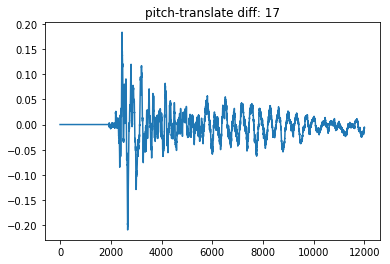

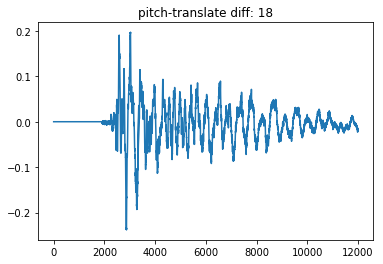

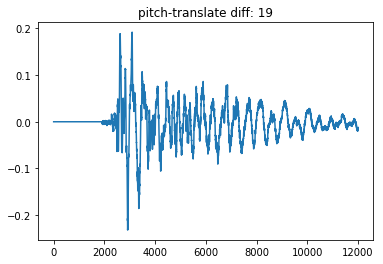

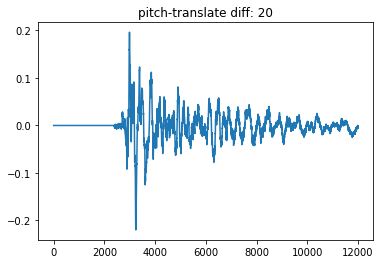

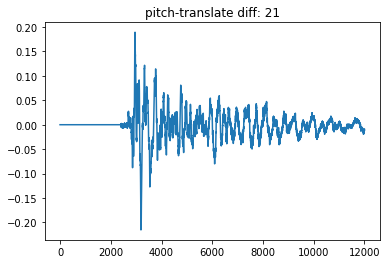

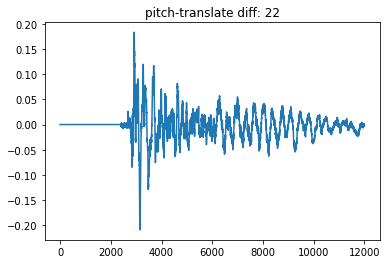

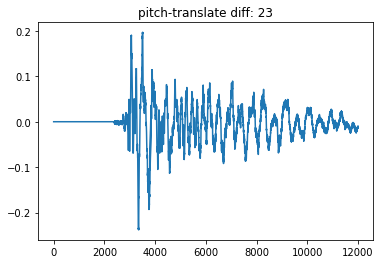

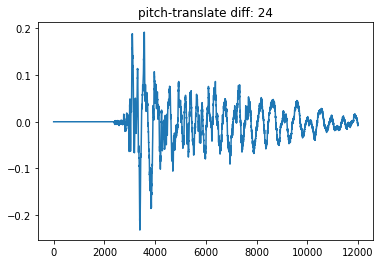

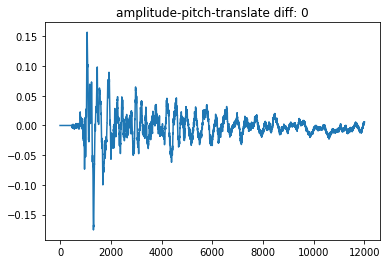

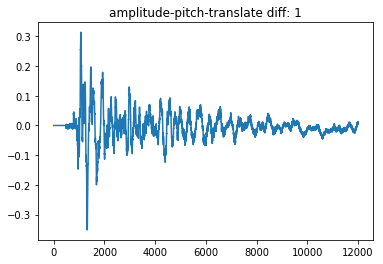

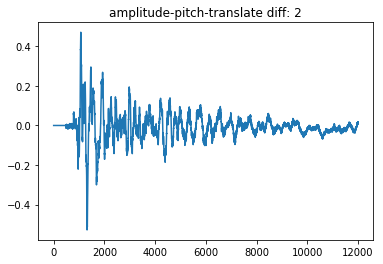

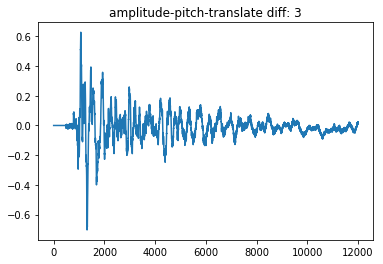

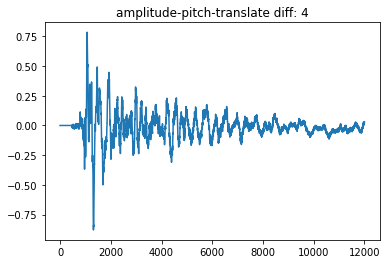

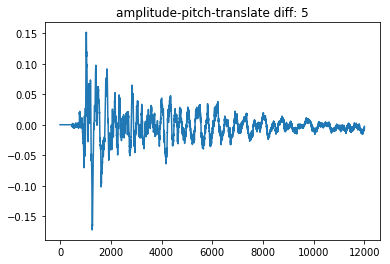

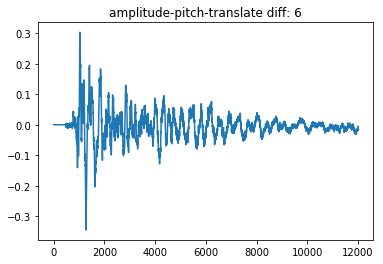

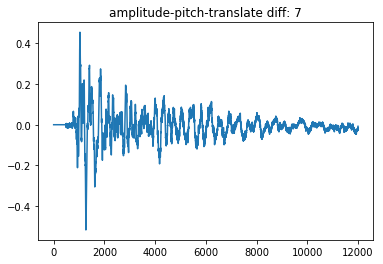

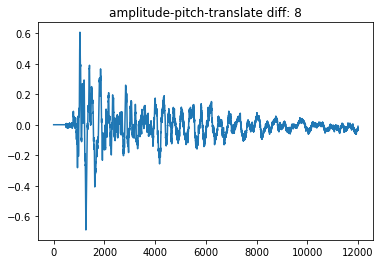

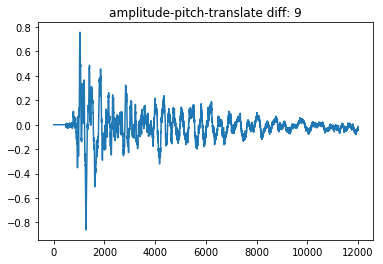

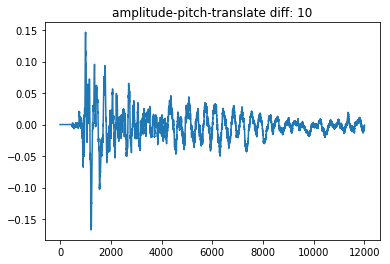

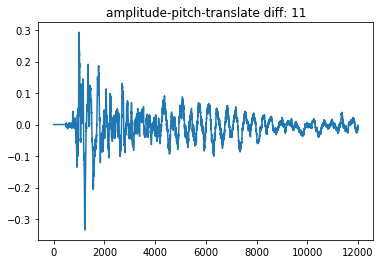

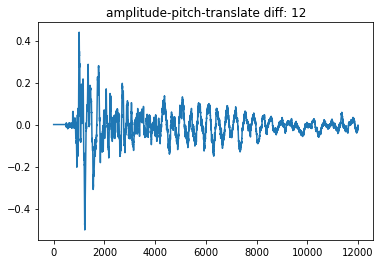

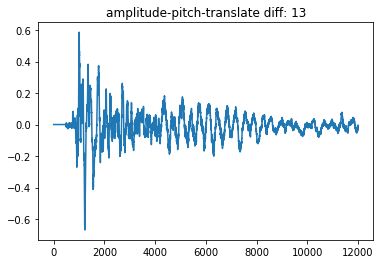

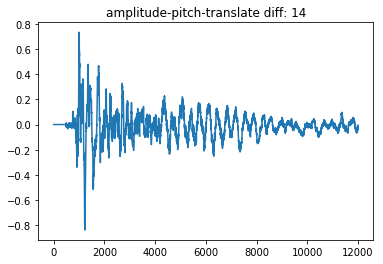

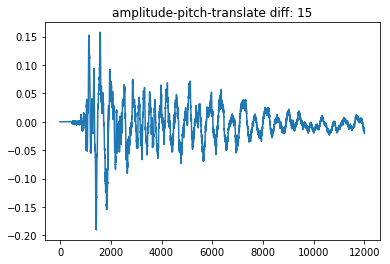

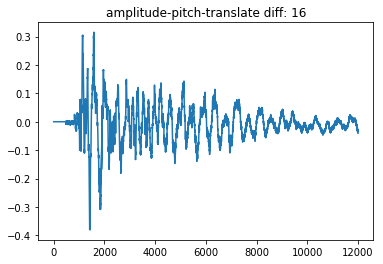

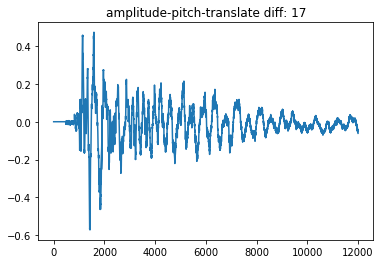

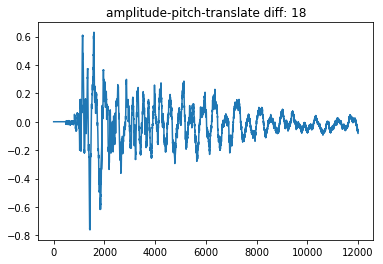

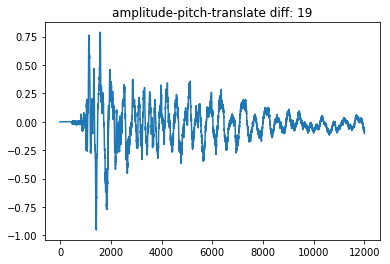

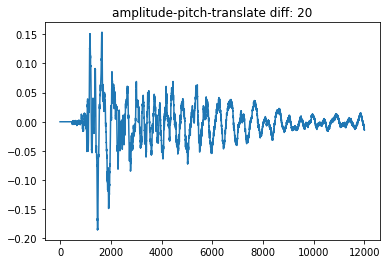

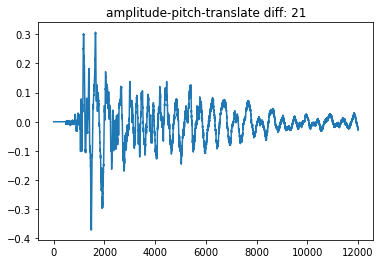

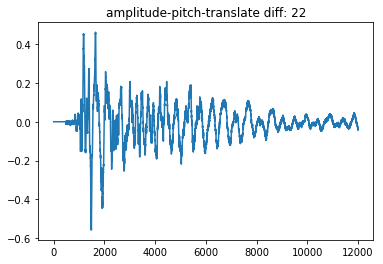

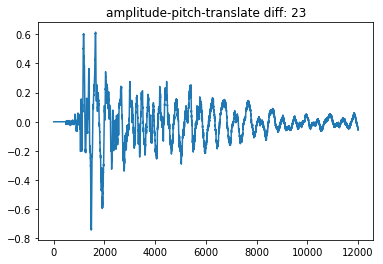

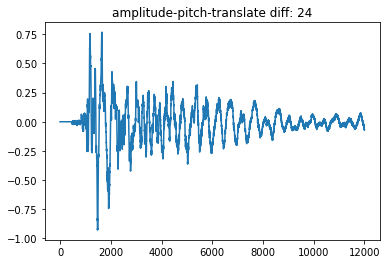

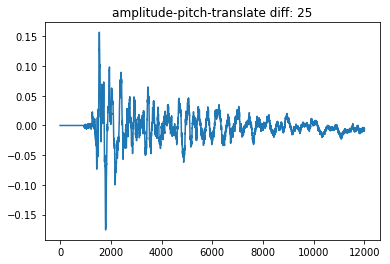

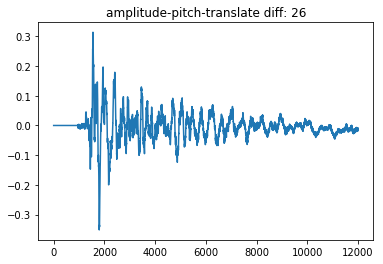

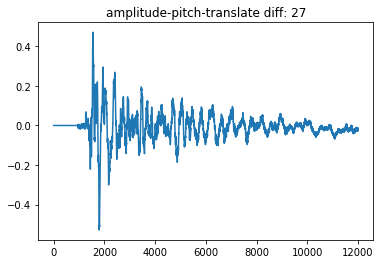

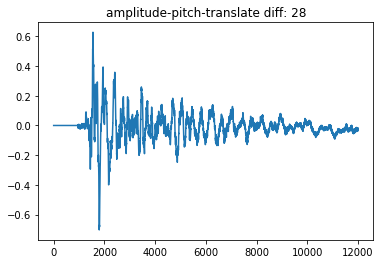

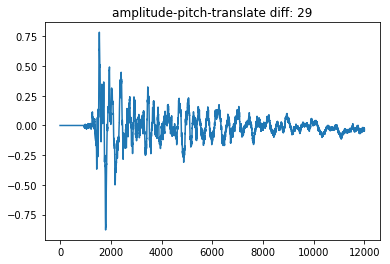

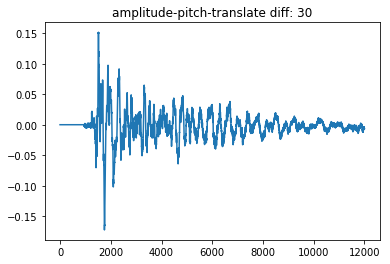

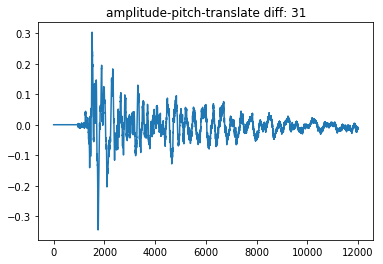

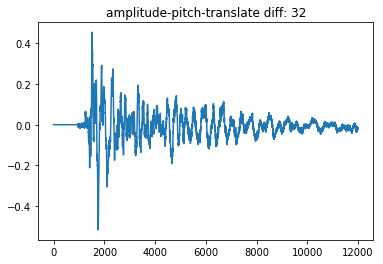

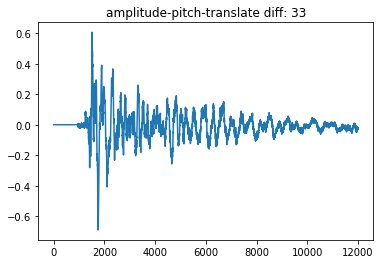

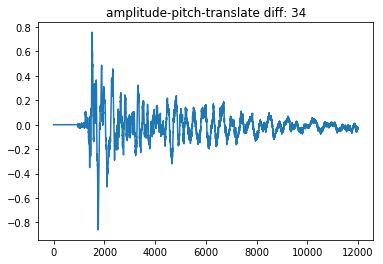

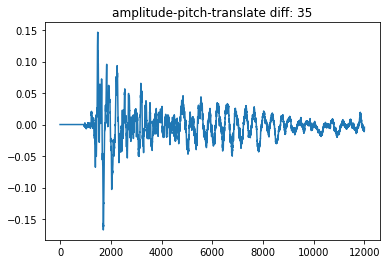

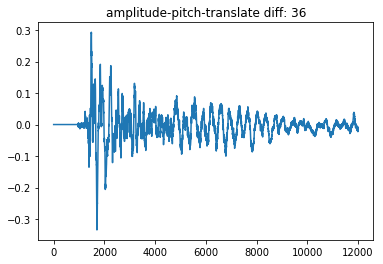

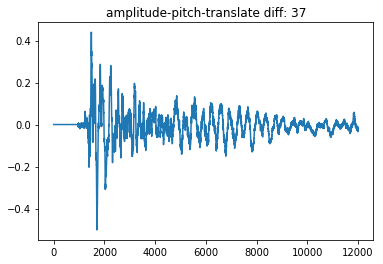

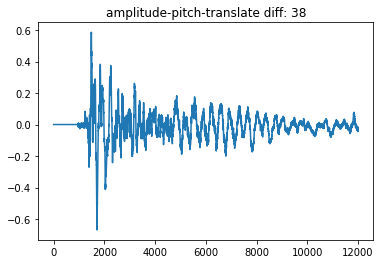

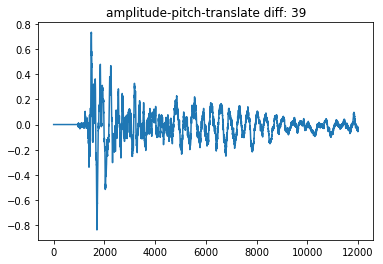

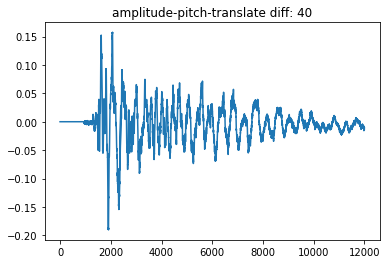

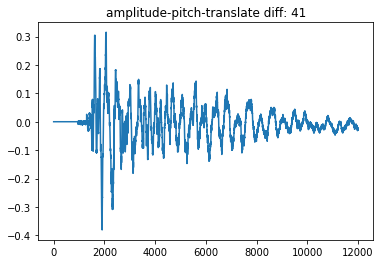

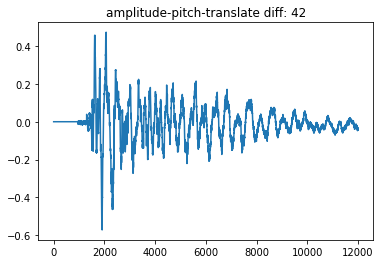

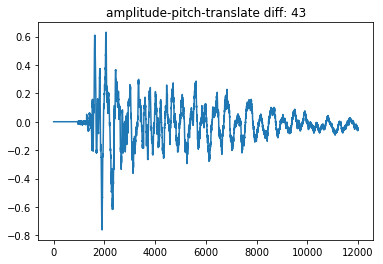

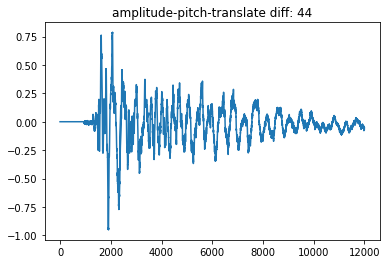

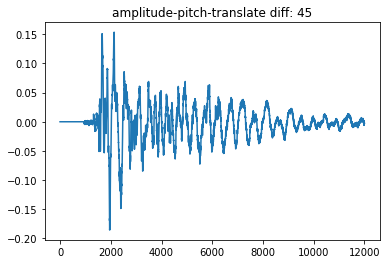

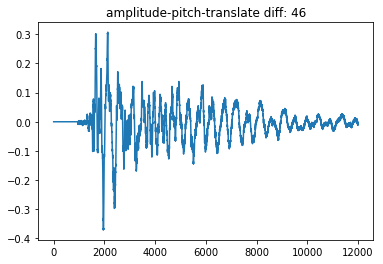

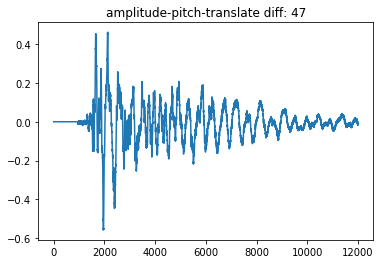

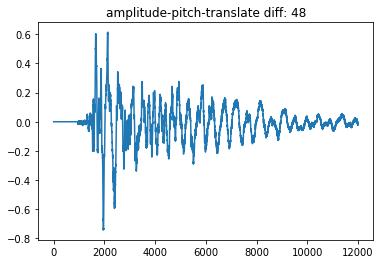

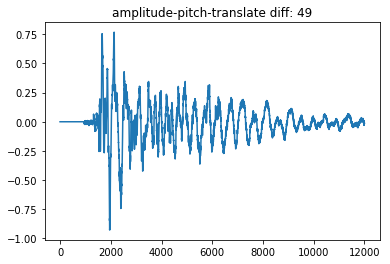

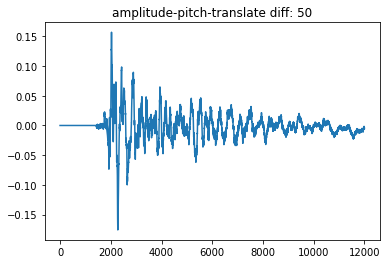

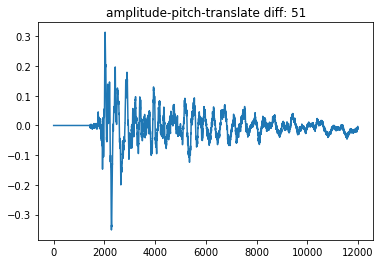

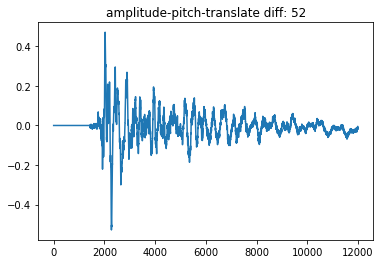

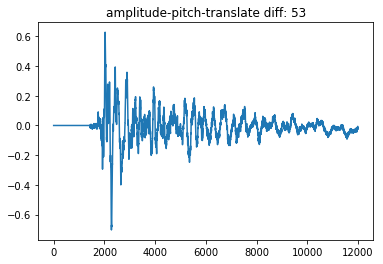

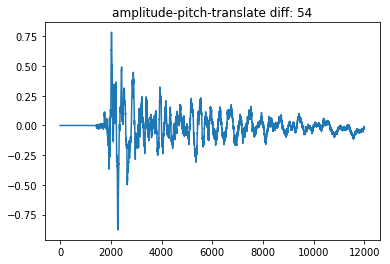

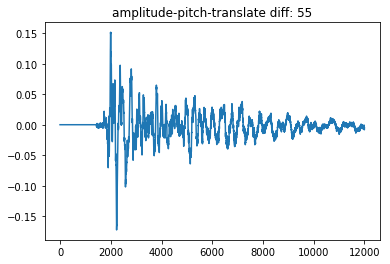

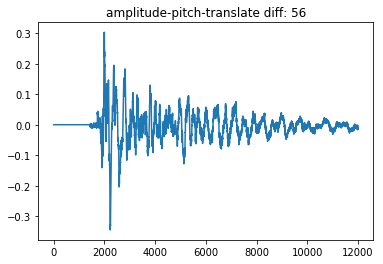

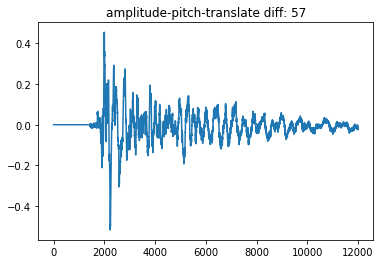

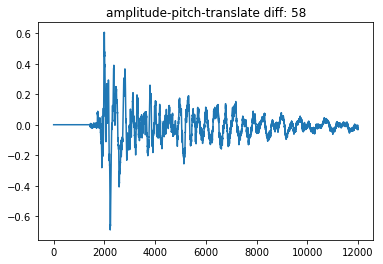

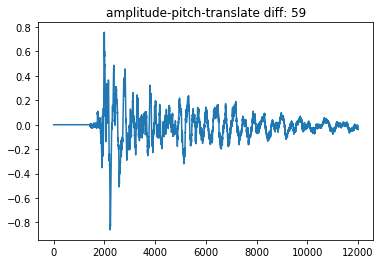

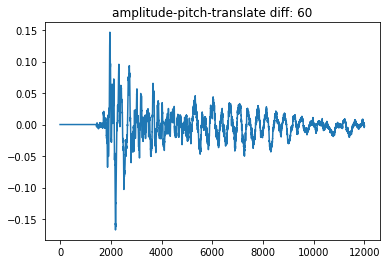

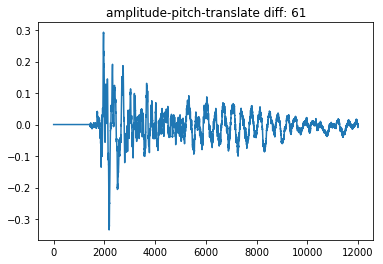

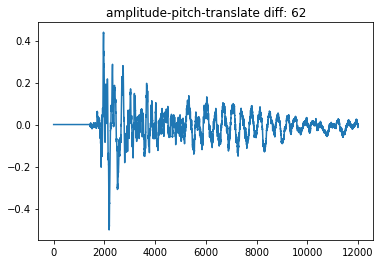

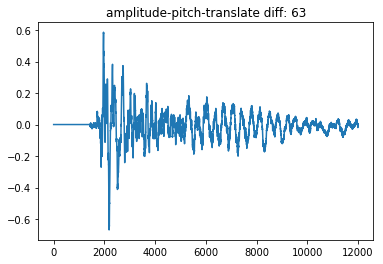

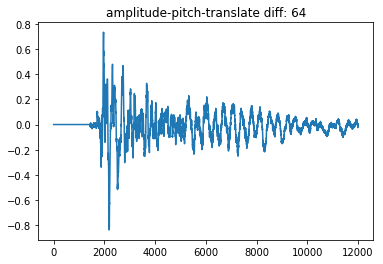

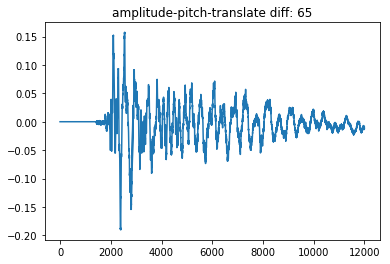

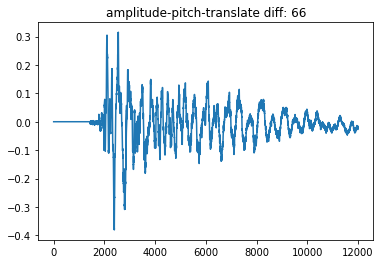

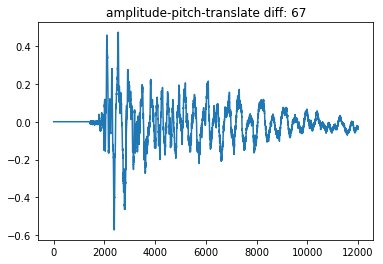

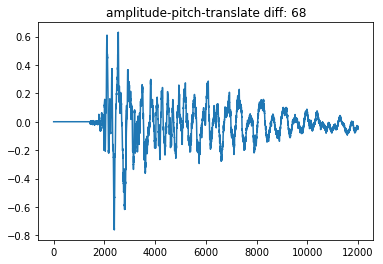

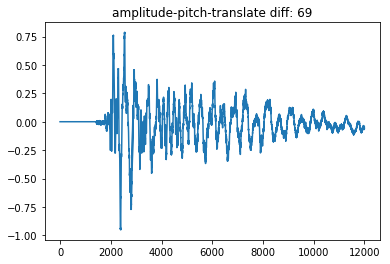

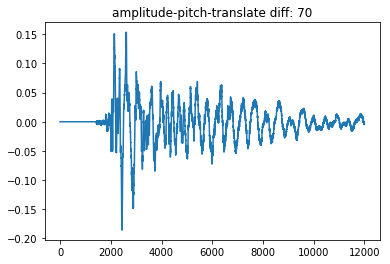

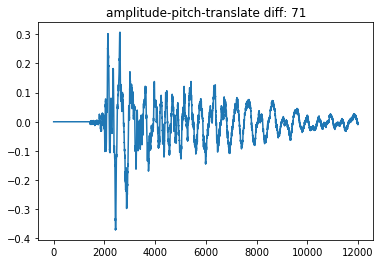

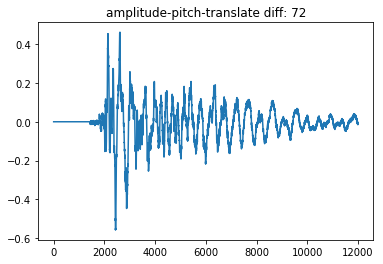

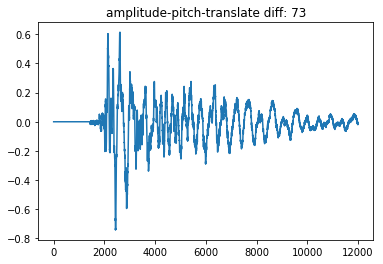

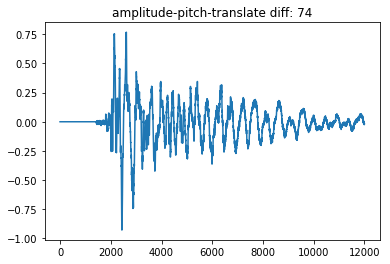

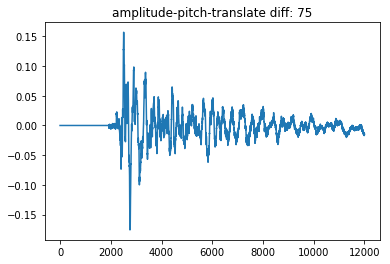

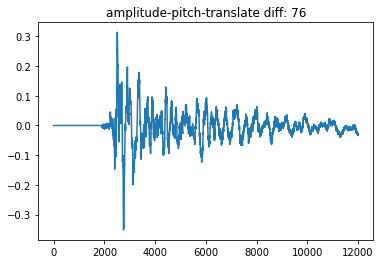

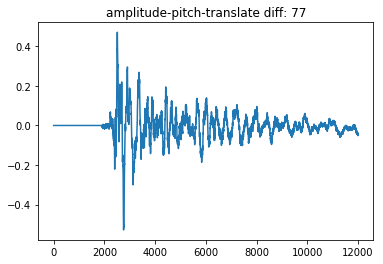

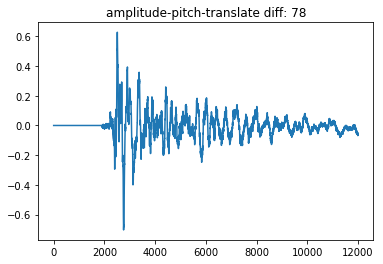

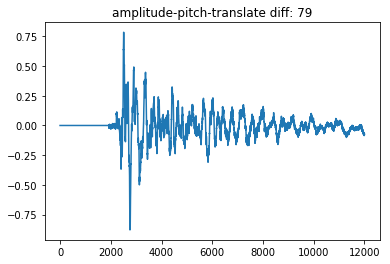

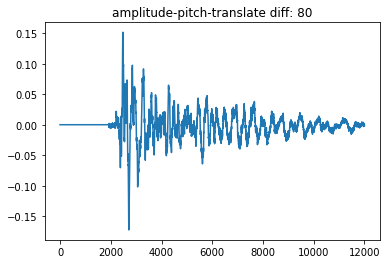

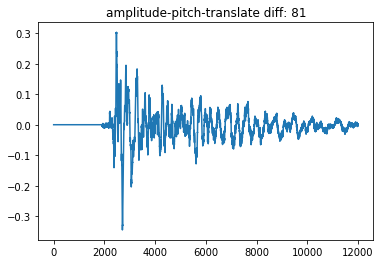

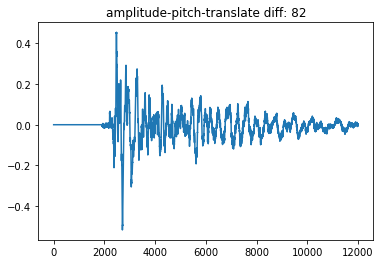

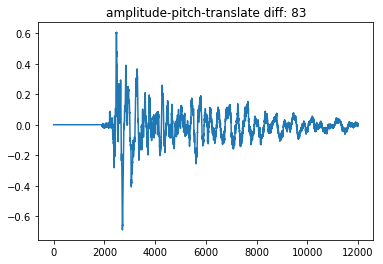

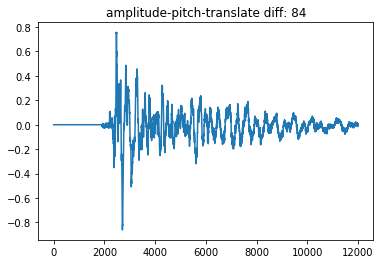

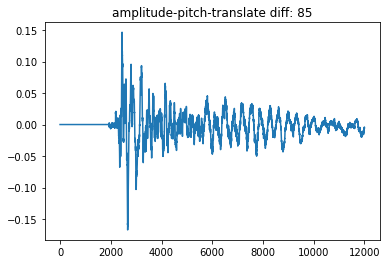

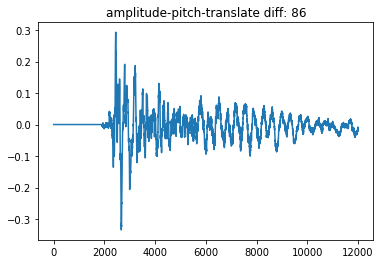

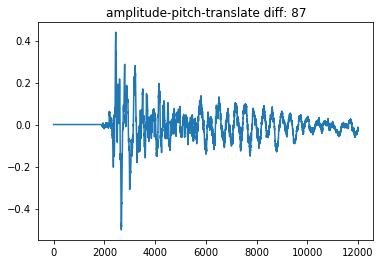

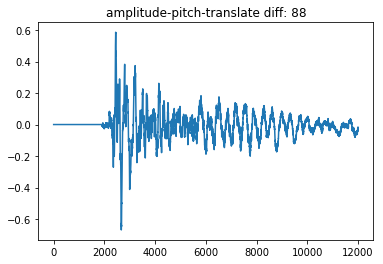

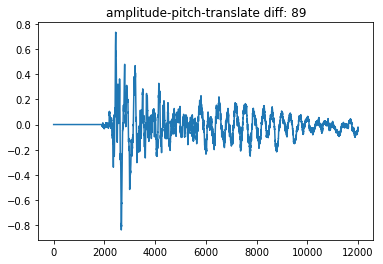

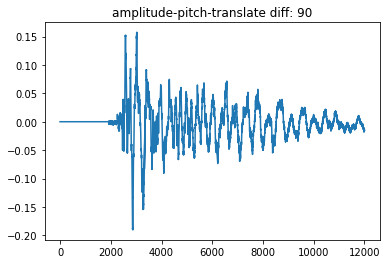

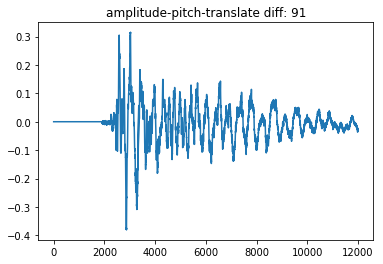

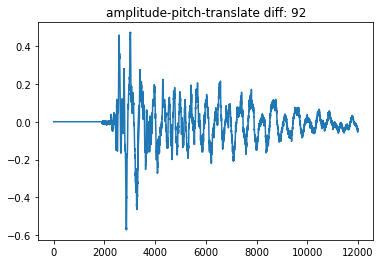

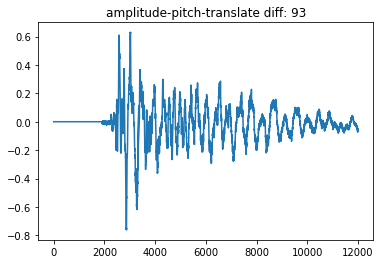

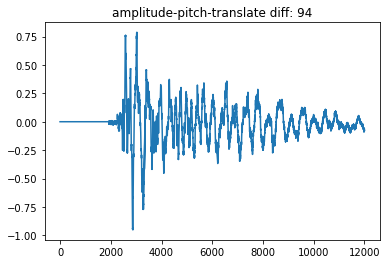

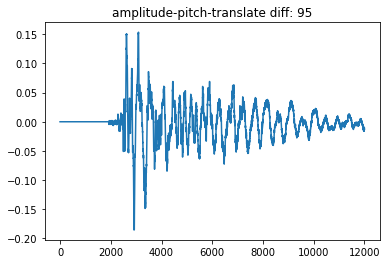

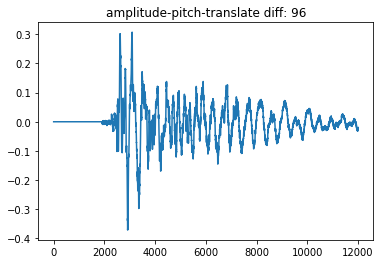

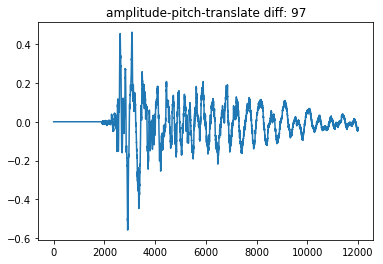

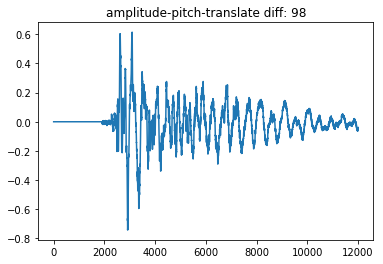

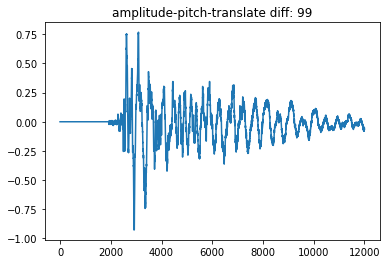

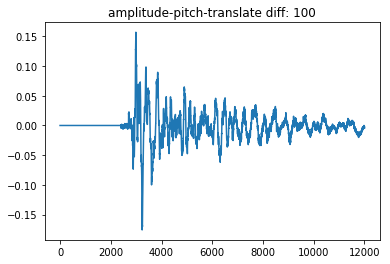

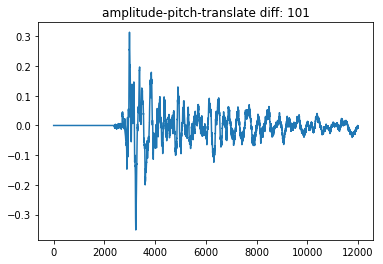

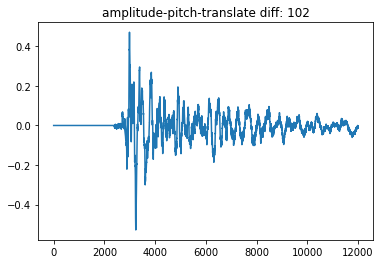

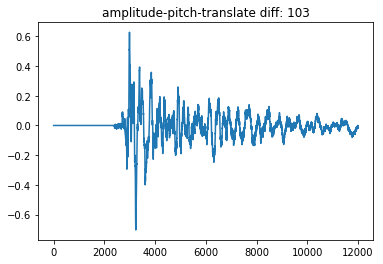

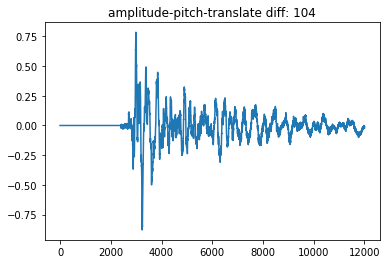

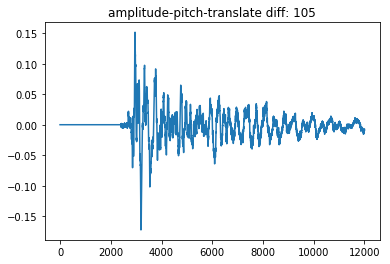

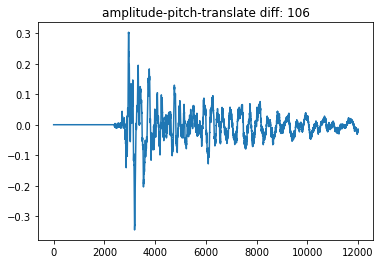

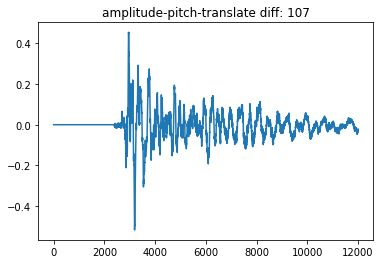

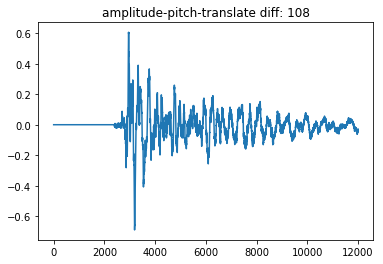

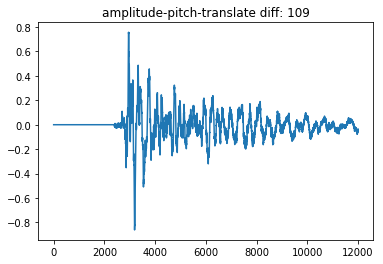

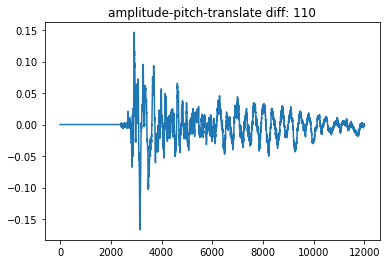

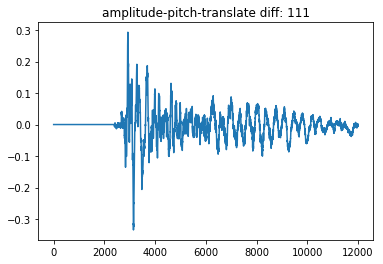

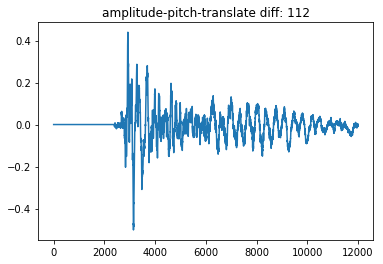

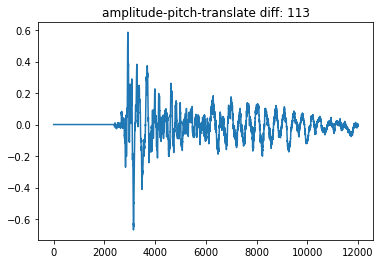

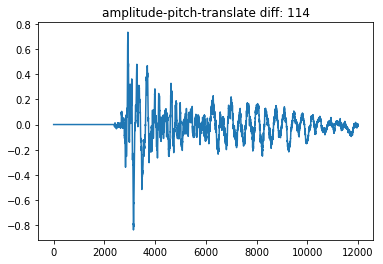

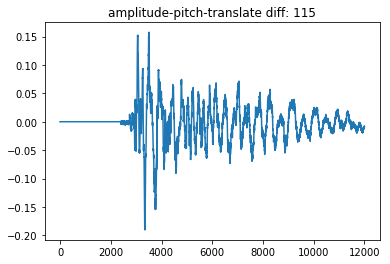

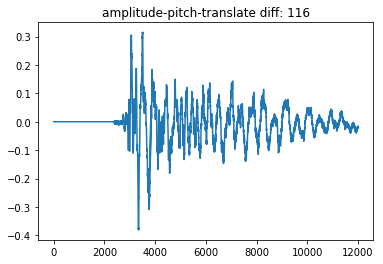

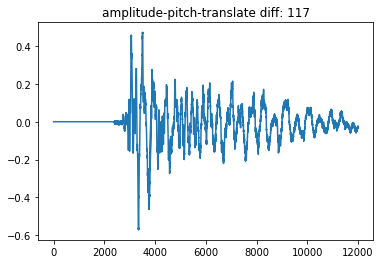

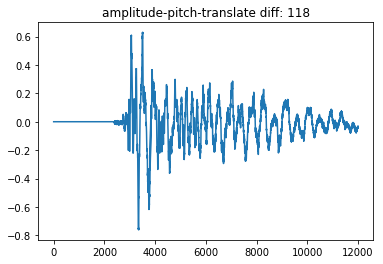

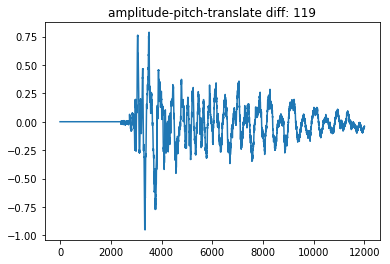

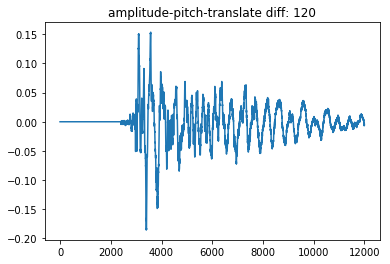

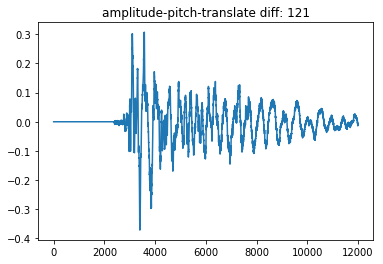

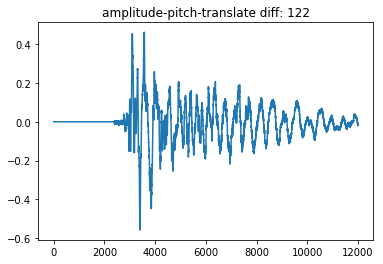

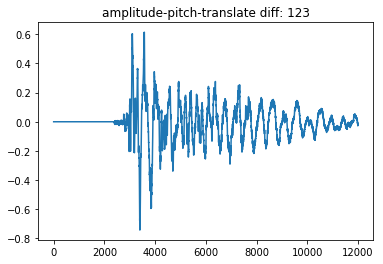

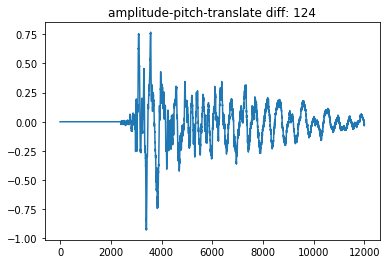

In [10]:
for stack_key in aug_keys:
    aug_amount = len(augmented_samples[0][stack_key])
    for d in range(aug_amount):
        plt.plot(augmented_samples[0][stack_key][d])
        plt.title("{} diff: {}".format(stack_key, d))
        plt.show()

In [11]:
ipd.Audio(samples[0].data, rate=samples[0].rate)

In [12]:
ipd.Audio(augmented_samples[0]["pitch"][0], rate=samples[0].rate)

In [13]:
ipd.Audio(augmented_samples[0]["pitch"][-1], rate=samples[0].rate)

In [14]:
ipd.Audio(augmented_samples[0]["translate"][0], rate=samples[0].rate)

In [15]:
ipd.Audio(augmented_samples[0]["translate"][-1], rate=samples[0].rate)

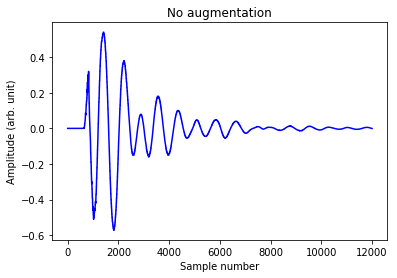

In [28]:
plt.plot(samples[4].data, color="blue")
plt.title("No augmentation")
plt.ylabel("Amplitude (arb. unit)")
plt.xlabel("Sample number")
plt.show()

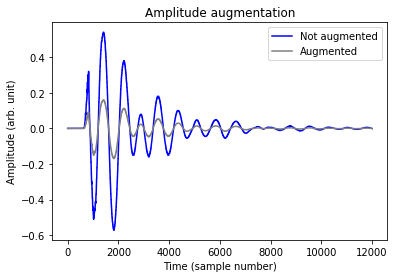

In [35]:
plt.plot(samples[4].data, color="blue", label="Not augmented")
plt.plot(augmented_samples[4]["amplitude"][0], color="grey", label="Augmented")
plt.title("Amplitude augmentation")
plt.ylabel("Amplitude (arb. unit)")
plt.xlabel("Time (sample number)")
plt.legend()
plt.show()

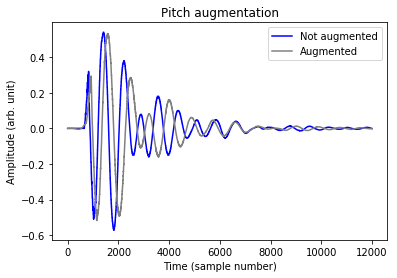

In [36]:
plt.plot(samples[4].data, color="blue", label="Not augmented")
plt.plot(augmented_samples[4]["pitch"][-1], color="grey", label="Augmented")
plt.title("Pitch augmentation")
plt.ylabel("Amplitude (arb. unit)")
plt.xlabel("Time (sample number)")
plt.legend()
plt.show()

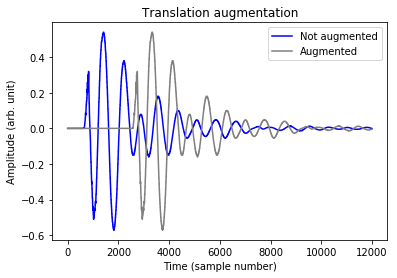

In [40]:
plt.plot(samples[4].data, color="blue", label="Not augmented")
plt.plot(augmented_samples[4]["translate"][3], color="grey", label="Augmented")
plt.title("Translation augmentation")
plt.ylabel("Amplitude (arb. unit)")
plt.xlabel("Time (sample number)")
plt.legend()
plt.show()